# Example Radiomic Feature Extraction by PyRadiomics
PyRadiomics document: https://pyradiomics.readthedocs.io/en/latest/

This example is from the package creators (although improved and modified for the coursework by Janan ARSLAN), and the original can be found at https://colab.research.google.com/drive/17Mx7VK45FvhB5XeL5xNbjLgbcyIrOWDn. 

## Install packages

In [12]:
!pip install -U pip wheel setuptools
!pip install numpy
!pip install pyradiomics
!pip install matplotlib
!pip install gdown

## Download example data and PyRadiomics configuration file
The example NIfTI data is the first case of the pancreas data set from Medical Segmentation Decathlon (http://medicaldecathlon.com/).

The example configureation file is modified from the example CT configuration file from PyRadiomics (https://github.com/AIM-Harvard/pyradiomics/tree/master/examples/exampleSettings).

In [13]:
! gdown https://drive.google.com/uc?id=1S_vOk3SXK_ZiaBN_zV1DxSZBgiZVyNa- -O example_nifti.zip
! unzip -q -o example_nifti.zip

Downloading...
From (original): https://drive.google.com/uc?id=1S_vOk3SXK_ZiaBN_zV1DxSZBgiZVyNa-
From (redirected): https://drive.google.com/uc?id=1S_vOk3SXK_ZiaBN_zV1DxSZBgiZVyNa-&confirm=t&uuid=3f8dac80-a3e7-46b8-80cf-cd7667772fa4
To: /home/jovyan/example_nifti.zip
100%|██████████████████████████████████████| 33.5M/33.5M [00:00<00:00, 36.9MB/s]


In [14]:
! gdown https://drive.google.com/uc?id=1RZyvAm8YTjEzYi2PrkxMWX00sUCzjgoC -O exampleCT_config.yaml

Downloading...
From: https://drive.google.com/uc?id=1RZyvAm8YTjEzYi2PrkxMWX00sUCzjgoC
To: /home/jovyan/exampleCT_config.yaml
100%|██████████████████████████████████████| 3.46k/3.46k [00:00<00:00, 15.1MB/s]


## Import packages

In [15]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
from radiomics import featureextractor

## Read NIfTI image and segmentation as SimpleITK format

In [17]:
image = sitk.ReadImage('./pancreas_001_image.nii.gz')
segmentation = sitk.ReadImage('./pancreas_001_label.nii.gz')

### View a slice of data

Exercise: change the slice for plotting to view different slice of the data

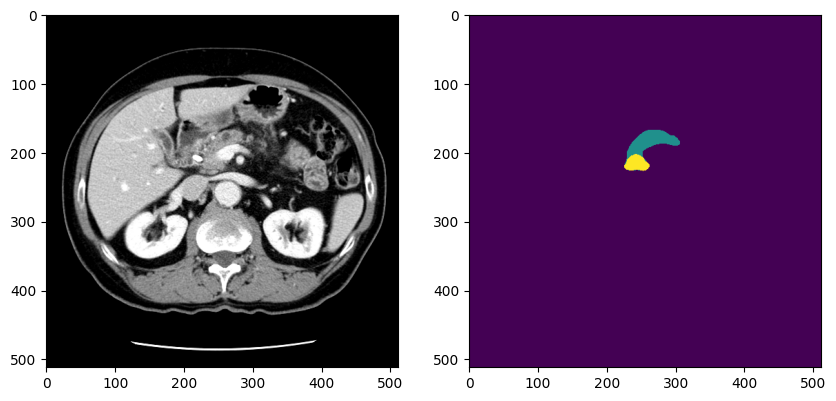

In [18]:
# Set the number of slice for plotting
z = 51

hu_l = -100
hu_h = 200

array_img = sitk.GetArrayFromImage(image)
array_seg = sitk.GetArrayFromImage(segmentation)

I = np.fliplr(np.flipud(array_img[z, :, :]))
S = np.fliplr(np.flipud(array_seg[z, :, :]))

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray', vmin=hu_l, vmax=hu_h)
plt.subplot(1, 2, 2)
plt.imshow(S)
plt.show()

## Extract radiomic features
There are many ways to setup the extractor. Here we use configuration file to setup the extractor.

After the extractor is prepared, one can extract the radiomic features by providing image and lable (ROI), which should be SimpleITK format or the file path.

Note that for pancreas segmentation in MSD data, 0 means background, 1 means pancreas, and 2 means lesion.

In [19]:
# Define extractor
extractor = featureextractor.RadiomicsFeatureExtractor('exampleCT_config.yaml',
                                                       preCrop=True)

In [20]:
extractor.settings

{'minimumROIDimensions': 2,
 'minimumROISize': None,
 'normalize': False,
 'normalizeScale': 1,
 'removeOutliers': None,
 'resampledPixelSpacing': [1, 1, 1],
 'interpolator': 'sitkLinear',
 'preCrop': True,
 'padDistance': 5,
 'distances': [1],
 'force2D': False,
 'force2Ddimension': 0,
 'resegmentRange': None,
 'label': 1,
 'additionalInfo': True,
 'binWidth': 16,
 'voxelArrayShift': 1050}

Excercise: change the setting of extractor (e.g. bin width) and observed the change of output features

Hint 1: you can find the detail of setting in the documentation: https://pyradiomics.readthedocs.io/en/latest/customization.html#radiomics-customization-label

Hint 2: you can change the setting files and rerun the cell for defining extractor, add additional parameters in the extractor while defining, or modified the following cell to reset some setting.

In [21]:
# reset a setting of extractor

# extractor.settings['binWidth'] = 25

In [22]:
# Extract features from pancreas and lesion
features_pancreas = extractor.execute(image, segmentation, label=1)
features_lesion = extractor.execute(image, segmentation, label=2)

### View structure of extracted features

In [23]:
features_pancreas

OrderedDict([('diagnostics_Versions_PyRadiomics', 'v3.0.1'),
             ('diagnostics_Versions_Numpy', '2.2.4'),
             ('diagnostics_Versions_SimpleITK', '2.4.1'),
             ('diagnostics_Versions_PyWavelet', '1.8.0'),
             ('diagnostics_Versions_Python', '3.10.16'),
             ('diagnostics_Configuration_Settings',
              {'minimumROIDimensions': 2,
               'minimumROISize': None,
               'normalize': False,
               'normalizeScale': 1,
               'removeOutliers': None,
               'resampledPixelSpacing': [1, 1, 1],
               'interpolator': 'sitkLinear',
               'preCrop': True,
               'padDistance': 5,
               'distances': [1],
               'force2D': False,
               'force2Ddimension': 0,
               'resegmentRange': None,
               'label': 1,
               'additionalInfo': True,
               'binWidth': 16,
               'voxelArrayShift': 1050}),
             ('diagnostics

### Compare features from pancreas and lesion

Excercise: change the feature name to see the comparison of other features

In [24]:
feature_show = 'original_shape_MeshVolume'

print(features_pancreas[feature_show])
print(features_lesion[feature_show])

40657.416666666664
27029.0
